# Tesseract Image OCR Implementation

#### Download install file for Wndows from: https://github.com/UB-Mannheim/tesseract/wiki
     https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-w64-setup-v5.0.0-alpha.20210506.exe


In [1]:
# help pytohn bindings for the tesseract library installed
!pip install tesseract 
!pip install pytesseract

  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562569 sha256=caf8db8c61a3b3ebede03054754573941c0d5073a88470f194bbab789c01f225
  Stored in directory: c:\users\unknown\appdata\local\pip\cache\wheels\7f\a1\69\fabe07004553a36d818e4657fed410daf525fe1ae161f469d3
Successfully built tesseract
  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=fbba3fa9e8ac4adb62760fe3723254202604e207cd52d2e7817644ed131602af
  Stored in directory: c:\users\unknown\appdata\local\pip\cache\wheels\ac\5b\f4\d5bcc930771126a32285e058c576eda84e43691453a9f7ad71
Successfully built pytesseract


In [1]:
#import the libraries
from PIL import Image
import pytesseract
import cv2

In [7]:
import pkg_resources
pytesseract.pytesseract.tesseract_cm = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
# printing the tesseract version
print(pkg_resources.working_set.by_key['pytesseract'].version)

0.3.7


In [2]:
#declaring the exe path for tesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'


#loading the image from the disk
# image from : https://cran.r-project.org/web/packages/tesseract/vignettes/intro.html
image_to_ocr = cv2.imread('../Unknown/test_folder/testocr.png')

In [3]:
#preprocessing the image
# step 1 : covert to grey scale
preprocessed_img = cv2.cvtColor(image_to_ocr, cv2.COLOR_BGR2GRAY)
# step 2 : Do binary and otsu thresholding
preprocessed_img = cv2.threshold(preprocessed_img,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# step 3 : Smooth the image using median blur
preprocessed_img = cv2.medianBlur(preprocessed_img, 3)

#save the preprocessed image temporarily into the disk
cv2.imwrite('../Unknown/test_folder/temp_img.jpg',preprocessed_img)

#read the temp image from disk as pil image
preprocessed_pil_img = Image.open('../Unknown/test_folder/temp_img.jpg')

#pass the pil image to tesseract to do OCR
text_extracted = pytesseract.image_to_string(preprocessed_pil_img)

#print the text
#print(text_extracted.encode('utf-8'))
#
print(text_extracted)

#display the original image
cv2.imshow("Actual Image",image_to_ocr)
# waiting any key stroke toclose the window
cv2.waitKey(0)
cv2.destroyAllWindows()

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



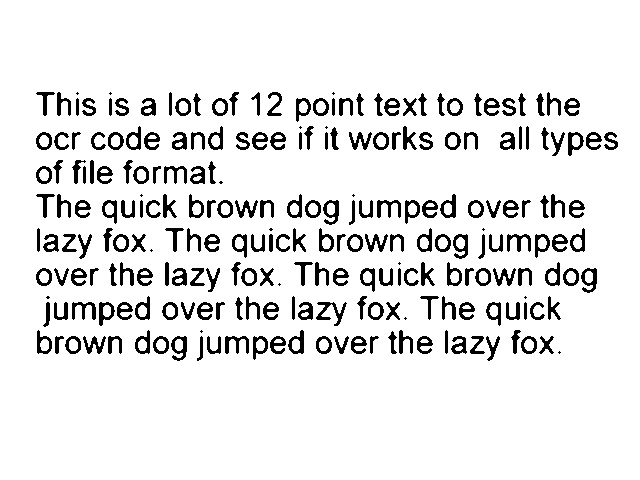

In [9]:
from IPython.display import Image
Image(filename='../Unknown/test_folder/temp_img.jpg') 